# Linear Regression

### Contexto do Problema

Dado o conjunto de dados de treinamento:

$$
X = \Big\{(x_1, y_1), (x_2, y_2), \ldots, (x_N, y_N)\Big\},
$$

onde $\mathbf{x}^{(i)} \in \mathbb{R}^{d}$ e $y^{(i)} \in \mathbb{R}$, $; i = 1, 2, \ldots, N$, considere:



- $\mathbf{x} = (x_1, \ldots, x_d) \in \mathbb{R}^d$, que representa os atributos das observações no espaço de entrada.
- Adicionamos uma coordenada artificial $x_0 = 1$, tal que $\tilde{\mathbf{x}} = (1, x_1, \ldots, x_d) \in \mathbb{R}^{1+d}$.

Nosso objetivo é ajustar um modelo de **regressão linear** para prever os valores $y_i$ a partir de $\mathbf{x}_i$, assumindo que a relação entre as variáveis $\mathbf{x}$ e $y$ pode ser aproximada linearmente:

$$
\hat{y} = \mathbf{w}^T \tilde{\mathbf{x}},
$$

onde $\mathbf{w} = (w_0, w_1, \ldots, w_d) \in \mathbb{R}^{1+d}$ é o vetor de pesos.

A função de custo a ser minimizada é o **Erro Quadrático Médio (MSE)**, dado por:

$$
\text{MSE} = \frac{1}{N} \sum_{i=1}^N \Big(y_i - \hat{y}\Big)^2.
$$



### Derivação da Função de Custo

A função de custo da **regressão linear** é definida como o **Erro Quadrático Médio (MSE)**:

$$
J(\mathbf{w}) = \frac{1}{N} \sum_{i=1}^N \Big(y_i - \hat{y}\Big)^2.
$$

### Forma Vetorial

Definimos:

- $\mathbf{X} \in \mathbb{R}^{N \times (d+1)}$, sendo a matriz de atributos com coordenada artificial $1$ adicionada:

$$
\mathbf{X} =
\begin{bmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1d} \\
1 & x_{21} & x_{22} & \cdots & x_{2d} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{N1} & x_{N2} & \cdots & x_{Nd}
\end{bmatrix}.
$$

- $\mathbf{y} \in \mathbb{R}^N$, sendo o vetor com os valores observados $y_i$:

$$
\mathbf{y} = 
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_N
\end{bmatrix}.
$$

- $\mathbf{w} \in \mathbb{R}^{d+1}$, sendo o vetor de pesos.

Expandindo a fórmula:

$$
J(\mathbf{w}) = \frac{1}{N} (\mathbf{y} - \mathbf{X}\mathbf{w})^T (\mathbf{y} - \mathbf{X}\mathbf{w}).
$$

### Gradiente da Função de Custo

Para minimizar $J(\mathbf{w})$, calculamos o gradiente em relação a $\mathbf{w}$:

$$
\nabla_{\mathbf{w}}J(\mathbf{w}) = \frac{2}{N} (\mathbf{X}^{T}\mathbf{y} -\mathbf{X}^{T}\mathbf{X}\mathbf{w})
$$

$$
\nabla_{\mathbf{w}} J(\mathbf{w}) = -\frac{2}{N} \mathbf{X}^T (\mathbf{y} - \mathbf{X}\mathbf{w}).
$$

### Condição de Otimalidade

Para encontrar o mínimo, igualamos o gradiente a zero:

$$
\nabla_{\mathbf{w}} J(\mathbf{w}) = 0.
$$

Portanto:

$$
-\frac{2}{N} \mathbf{X}^T (\mathbf{y} - \mathbf{X}\mathbf{w}) = 0.
$$

Simplificando:

$$
\mathbf{X}^T (\mathbf{y} - \mathbf{X}\mathbf{w}) = 0.
$$

Distribuímos o produto interno:

$$
\mathbf{X}^T\mathbf{y} - \mathbf{X}^T\mathbf{X}\mathbf{w} = 0.
$$

Reorganizamos para isolar $\mathbf{w}$:

$$
\mathbf{X}^T\mathbf{y} = \mathbf{X}^T\mathbf{X}\mathbf{w}.
$$

Multiplicamos ambos os lados pela inversa de $\mathbf{X}^T\mathbf{X}$ (assumindo que $\mathbf{X}^T\mathbf{X}$ é invertível):

$$
\mathbf{w} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}.
$$


## Praticando...

### Dados de Treinamento

- O espaço de entrada será representado por $\mathbb{R}^1$, ou seja, uma linha reta onde cada ponto é descrito por um número real: $\mathbf{x}$.
- Nosso conjunto de dados conterá $N$ pontos distribuídos no intervalo $[0, 2] \subseteq \mathbb{R}^1$.
- O valor $y$ de cada ponto será calculado por uma função linear com ruído adicionado:

$$
y = f(x) + \epsilon,
$$

onde 

$$
f(x) = w_0 + wx
$$

e $\epsilon$ é um termo de ruído gaussiano $\epsilon \sim \mathcal{N}(0, \sigma^2)$.

---

### Ilustração

- Traçaremos um gráfico com os dados de treinamento, onde os valores reais $y_i$ serão representados por **pontos** e a predição $\hat{y}_i$ pelo modelo será representada por uma **linha contínua**.
- A linha ajustada representará a melhor aproximação linear aos dados, obtida minimizando o erro quadrático médio.

---

### Exercício

1. Gere $N$ pontos de treinamento $(x, y)$ de forma aleatória dentro do intervalo $[0, 2]$.
2. Ajuste o modelo de regressão linear $\hat{y} = \mathbf{w}^T \tilde{\mathbf{x}}$ onde $\tilde{\mathbf{x}} = (1, x)$ inclui o termo $1$ como coordenada artificial.

3. Plote:
    - Os pontos de treinamento $(x, y)$ como pontos dispersos no gráfico.
    - A linha de regressão ajustada no mesmo gráfico.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

N = 100  # Número de pontos
w = np.asarray([[1.0],[2.0]]) # pesos
sigma = 0.2  # Desvio padrão do ruído

xmin = ymin = -1
xmax = ymax = 2

np.random.seed(42)
X = np.random.uniform(xmin, xmax, size=(N, 1)) # Cria um array com dados aleatórios com N = 6 e d = 2.
Xe = np.column_stack((np.ones(X.shape[0]), X)) # Array estendido com 1s

# Calcular y com ruído
epsilon = np.random.normal(0, sigma, N).reshape(-1, 1)  # Ruído gaussiano
y = np.dot(Xe, w) + epsilon

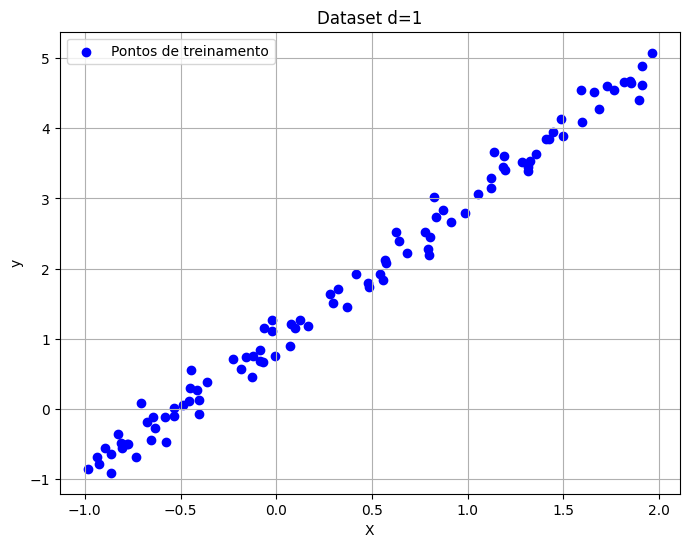

In [2]:
# Visualizar os dados
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Pontos de treinamento')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Dataset d=1')
plt.legend()
plt.grid(True)
plt.show()

### Função do cáclulo do peso

In [3]:
def equation_weights(X, y):
    """
    Calculates the weights of a linear function using the normal equation method.
    You should add into X a new column with 1s.

    :param X: design matrix
    :type X: np.ndarray(shape=(N, d))
    :param y: regression targets
    :type y: np.ndarray(shape=(N, 1))
    :return: weight vector
    :rtype: np.ndarray(shape=(d+1, 1))
    """
    Xe = np.column_stack((np.ones(X.shape[0]), X))
    w = np.linalg.inv(Xe.T @ Xe)@(Xe.T @ y)
    return w
    

In [4]:
w = equation_weights(X, y)
print("Estimated w =\n", w)

Estimated w =
 [[1.01236768]
 [1.96934845]]


### Predição

In [5]:
def prediction(X, w):
    """
    Calculates the prediction over a set of observations X using the linear function
    characterized by the weight vector w.
    You should add into X a new column with 1s.

    :param X: design matrix
    :type X: np.ndarray(shape=(N, d))
    :param w: weight vector
    :type w: np.ndarray(shape=(d+1, 1))
    :param y: regression prediction
    :type y: np.ndarray(shape=(N, 1))
    """
    Xe = np.column_stack((np.ones(X.shape[0]), X))
    yhat = np.dot(Xe,w) 
    return yhat

### Desenhar os dados e a reta da regressão linear

In [6]:
def plot_linear_regression(X, y, y_pred, title="Regressão Linear (1D)", xlabel="X", ylabel="y"):
    """
    Função para plotar a regressão linear em 1D.
    
    Parâmetros:
    - X: array-like, valores da variável independente.
    - y_true: array-like, valores reais da variável dependente.
    - y_pred: array-like, valores previstos pelo modelo.
    - w: array-like, coeficientes da regressão (w = [w0, w1]).
    - title: str, título do gráfico.
    - xlabel: str, rótulo do eixo x.
    - ylabel: str, rótulo do eixo y.
    """
    plt.figure(figsize=(8, 6))

    # Plotar os dados reais
    plt.scatter(X, y, color='blue', label='Dados Reais', alpha=0.6)

    # Plotar a linha de regressão
    plt.plot(X, y_pred, color='red', label=f'Regressão linear', linewidth=2)

    # Configurações do gráfico
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.show()

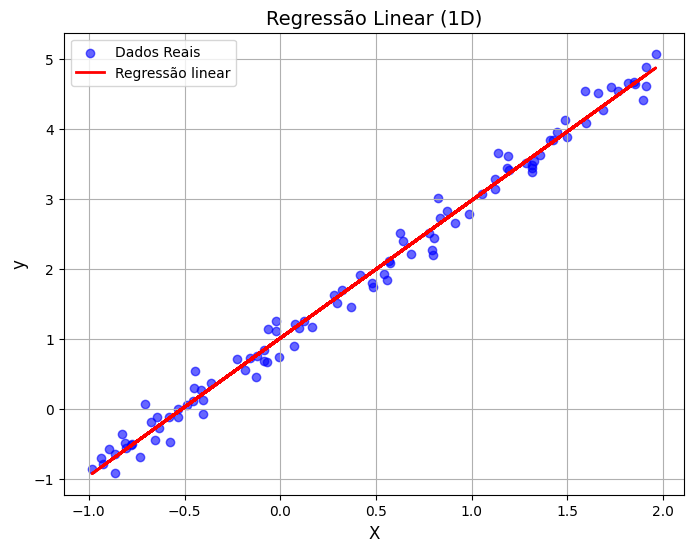

In [7]:
yhat = prediction(X,w)
# Visualizar os dados
plot_linear_regression(X,y,yhat)

In [8]:
# Cálculo direto do R² (coeficiente de determinação)
# Mede a proporção da variância nos dados reais que é explicada pelo modelo.
# Valor ideal: R² próximo de 1.0 (indica um ótimo ajuste).
# Se R² < 0, significa que o modelo é pior que a média simples dos dados.
ss_total = np.sum((y - np.mean(y)) ** 2)  # Soma dos quadrados totais
ss_residual = np.sum((y - yhat) ** 2)  # Soma dos quadrados residuais
r2 = 1 - (ss_residual / ss_total)  # Coeficiente de determinação

# Erro Absoluto Médio (MAE):
# Mede o erro médio absoluto entre os valores previstos e os reais.
# É fácil de interpretar, pois mantém a mesma unidade do valor de saída (y).
# Valor ideal: MAE próximo de 0 (indica que as previsões estão muito próximas dos valores reais).
mae = np.mean(np.abs(y - yhat))

# Erro Quadrático Médio (MSE):
# Mede o erro médio quadrático entre os valores previstos e os reais.
# Penaliza erros maiores de forma mais severa (devido à elevação ao quadrado).
# Valor ideal: MSE próximo de 0. Quanto menor, melhor.
mse = np.mean((y - yhat) ** 2)

# Raiz do Erro Quadrático Médio (RMSE):
# É a raiz quadrada do MSE. Mede o erro médio, mantendo a unidade de saída (y).
# Ideal para interpretar o erro médio em problemas práticos.
# Valor ideal: RMSE próximo de 0, semelhante ao MAE.
rmse = np.sqrt(np.mean((y - yhat) ** 2))

print(f"R² = {r2}\nMAE = {mae}\nMSE = {mse}\nRMSE = {rmse}")

R² = 0.9895603408417428
MAE = 0.1402085343927553
MSE = 0.03226338255868215
RMSE = 0.17962010622055136
